In [167]:
import numpy as np
import scipy

In [168]:
a = np.matrix([[1, 2], [1, 1]])
b = np.array([0,1])

In [169]:
a

matrix([[1, 2],
        [1, 1]])

In [170]:
np.linalg.solve(a,b)

array([ 2., -1.])

In [171]:
a = np.array([1,2,1,1]).reshape(2,2)

In [172]:
a

array([[1, 2],
       [1, 1]])

In [173]:
a.flatten()

array([1, 2, 1, 1])

In [174]:
a.ravel()

array([1, 2, 1, 1])

In [175]:
np.linalg.lstsq(a,b, rcond=None)

(array([ 2., -1.]),
 array([], dtype=float64),
 2,
 array([2.61803399, 0.38196601]))

In [176]:
#Fit a line, y = mx + c, 
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([-1, 0.2, 0.9, 2.1, 3, 2.8, 4.2])

In [177]:
ones = np.ones(len(x))
ones

array([1., 1., 1., 1., 1., 1., 1.])

In [178]:
A = np.vstack([x, ones]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.]])

In [179]:
A.shape

(7, 2)

In [180]:
# notice we are taking the first (0) argument from the function
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m = 0.81785714
c = -0.71071429

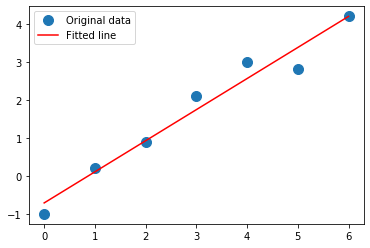

In [181]:
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

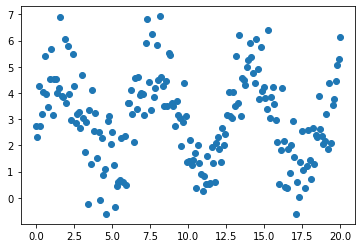

In [182]:
n = 200
t = np.linspace(0,20,n)
y = 3.0 + 2.0 * np.sin(t) + np.random.randn(n)
plt.plot(t, y, 'o')

In [183]:
a = np.c_[np.ones(n),np.sin(t)]
x,res,rank,s = np.linalg.lstsq(a, y, rcond=None)

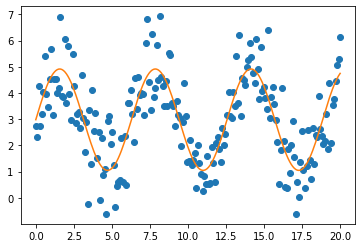

In [184]:
plt.plot(t, y, 'o')
plt.plot(t, np.dot(a,x))

In [185]:
res

array([187.20571414])

In [186]:
from sklearn.metrics import r2_score

r2_score(y,np.dot(a,x))

0.662018966982246

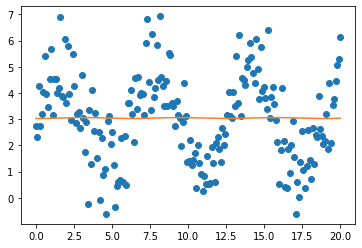

In [187]:
a = np.c_[np.ones(n),np.cos(t)]
x,res,rank,s = np.linalg.lstsq(a, y, rcond=None)
plt.plot(t, y, 'o')
plt.plot(t, np.dot(a,x))

In [188]:
res, r2_score(y,np.dot(a,x))

(array([553.86019571]), 6.128574499120187e-05)

In [211]:
from scipy.optimize import curve_fit

def funfit(t, a, b, omega):
    return a + b*np.sin(omega*t)

popt, pcov = curve_fit(funfit, t, y)

In [212]:
popt

array([2.98997526, 1.94119462, 0.99549479])

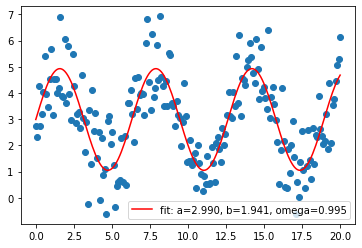

In [213]:
plt.plot(t, y, 'o')
plt.plot(t, funfit(t, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, omega=%5.3f' % tuple(popt))
plt.legend()
plt.show()

In [214]:
pcov

array([[ 4.78107774e-03, -2.52427703e-04, -3.00303110e-05],
       [-2.52427703e-04,  9.68364377e-03, -9.46778324e-06],
       [-3.00303110e-05, -9.46778324e-06,  1.79350414e-05]])

In [215]:
perr = np.sqrt(np.diag(pcov))

In [216]:
perr

array([0.06914534, 0.09840551, 0.00423498])

In [217]:
r2_score(y,funfit(t, *popt))

0.6640146130989497

In [218]:
def fun2fit(t, a, b, omega):
    return a + b*np.cos(omega*t)

In [219]:
popt, pcov = curve_fit(fun2fit, t, y)
popt

array([3.11709939, 1.48157201, 0.88172375])

In [220]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.09319211, 0.13281591, 0.00744385])

In [221]:
r2_score(y,fun2fit(t, *popt))

0.3873138949059828

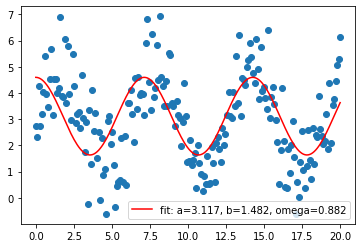

In [222]:
plt.plot(t, y, 'o')
plt.plot(t, fun2fit(t, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, omega=%5.3f' % tuple(popt))
plt.legend()
plt.show()

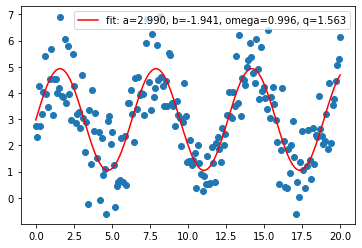

In [223]:
def fun3fit(t, a, b, omega,q):
    return a + b*np.cos(omega*t+q)

popt, pcov = curve_fit(fun3fit, t, y)

plt.plot(t, y, 'o')
plt.plot(t, fun3fit(t, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, omega=%5.3f, q=%5.3f' % tuple(popt))
plt.legend()
plt.show()

In [224]:
r2_score(y,fun3fit(t, *popt))

0.6640251863371477

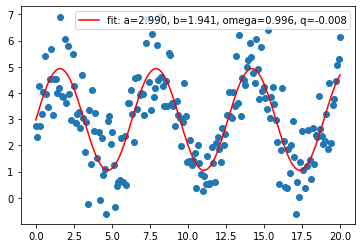

In [196]:
def fun3fit(t, a, b, omega,q):
    return a + b*np.sin(omega*t+q)

popt, pcov = curve_fit(fun3fit, t, y)
popt

plt.plot(t, y, 'o')
plt.plot(t, fun3fit(t, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, omega=%5.3f, q=%5.3f' % tuple(popt))
plt.legend()
plt.show()